Random Color:


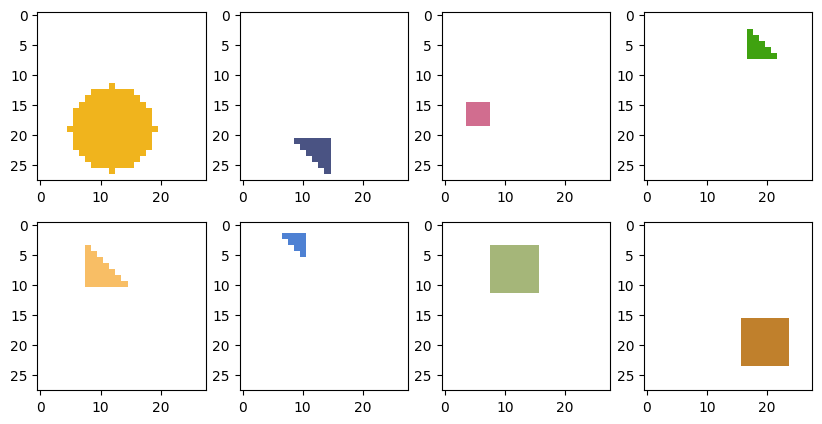

Fixed Color:


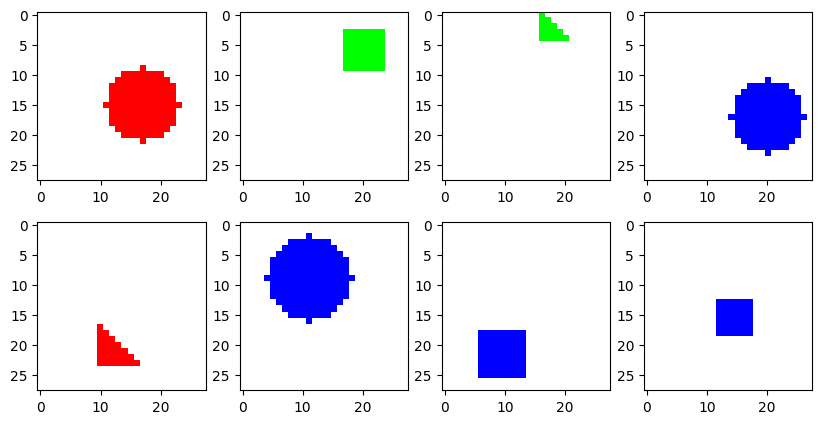

In [44]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

class GeometricFiguresDataset(torch.utils.data.Dataset):
    def __init__(self, num_samples=1000, image_size=(28, 28), random_color=True, color_list=None):
        self.num_samples = num_samples
        self.image_size = image_size
        self.random_color = random_color
        self.color_list = color_list
        
    def __len__(self):
        return self.num_samples
    
    def __getitem__(self, idx):
        image = self.generate_image()
        image_tensor = torch.from_numpy(image).permute(2, 0, 1).float() / 255.0
        return image_tensor
    
    def generate_image(self):
        image = np.ones((self.image_size[0], self.image_size[1], 3), dtype=np.uint8) * 255  # White background
        
        shape = np.random.choice(['square', 'circle', 'triangle'])
        color = self.choose_color()
        if shape == 'square':
            size = np.random.randint(3, self.image_size[0] // 3)
            image = self.draw_square(image, size, color)
        elif shape=='circle':
            radius = np.random.randint(3, self.image_size[0] // 3)
            image = self.draw_circle(image, radius, color)
        else:
            size = np.random.randint(3, self.image_size[0] // 3)
            image = self.draw_triangle(image, size, color)
            
        return image
    
    def choose_color(self):
        if self.random_color:
            return np.random.randint(0, 256, size=3)  # Random RGB color
        else:
            #return np.random.choice(self.color_list)
            color_r = np.array([255, 0, 0])
            color_g = np.array([0, 255, 0])
            color_b = np.array([0, 0, 255])
            #return one of the three colors
            rand_col = np.random.randint(0, 3)
            if rand_col == 0:
                return color_r
            elif rand_col == 1:
                return color_g
            else:
                return color_b

    
    def draw_square(self, image, size, color):
        x = np.random.randint(0, self.image_size[1] - size)
        y = np.random.randint(0, self.image_size[0] - size)
        image[y:y+size, x:x+size] = color
        return image

    def draw_triangle(self, image, size, color):
        x = np.random.randint(0, self.image_size[1] - size)
        y = np.random.randint(0, self.image_size[0] - size)
        image[y:y+size, x:x+size] = color
        
        # Determine whether to remove upper or lower half of the square
        if np.random.rand() < 0.5:
            # Remove upper half of the square
            for i in range(size):
                for j in range(size):
                    if i > j:
                        image[y+i, x+j] = 255  # Background color
        else:
            # Remove lower half of the square
            for i in range(size):
                for j in range(size):
                    if i < j:
                        image[y+i, x+j] = 255  # Background color
        return image
          
    def draw_circle(self, image, radius, color):
        x = np.random.randint(radius, self.image_size[1] - radius)
        y = np.random.randint(radius, self.image_size[0] - radius)
        
        yy, xx = np.ogrid[-y:image.shape[0]-y, -x:image.shape[1]-x]
        mask = xx*xx + yy*yy <= radius*radius
        image[mask] = color
        return image

# Example usage:
dataset_random_color = GeometricFiguresDataset(random_color=True)
dataloader_random_color = torch.utils.data.DataLoader(dataset_random_color, batch_size=8, shuffle=True)

dataset_fixed_color = GeometricFiguresDataset(random_color=False, color_list=[[255, 0, 0], [0, 255, 0], [0, 0, 255]])
dataloader_fixed_color = torch.utils.data.DataLoader(dataset_fixed_color, batch_size=8, shuffle=True)

# Visualize some samples with random color
print("Random Color:")
for batch in dataloader_random_color:
    plt.figure(figsize=(10, 5))
    for i in range(batch.size(0)):
        plt.subplot(2, 4, i+1)
        plt.imshow(batch[i].permute(1, 2, 0).numpy())
        #plt.axis('off')
    plt.show()
    break  # Only visualize one batch

# Visualize some samples with fixed color
print("Fixed Color:")
for batch in dataloader_fixed_color:
    plt.figure(figsize=(10, 5))
    for i in range(batch.size(0)):
        plt.subplot(2, 4, i+1)
        plt.imshow(batch[i].permute(1, 2, 0).numpy())
        #plt.axis('off')
    plt.show()
    break  # Only visualize one batch
